In [1]:
import twitter
import pandas as pd
import matplotlib.pyplot as plt
import pandas

In [2]:
df = pandas.read_csv('/home/nessa/Downloads/Trump.csv')

In [3]:
df['text']

0       Just met with UN Secretary-General António Gut...
1       America is a Nation that believes in the power...
2       RT @SteveForbesCEO: .@realDonaldTrump speech o...
3       We grieve for the terrible loss of life, and s...
4       School shooting in Texas. Early reports not lo...
                              ...                        
3191    The failing @nytimes writes total fiction conc...
3192    I call my own shots, largely based on an accum...
3193    Any negative polls are fake news, just like th...
3194    What an amazing comeback and win by the Patrio...
3195    Enjoy the #SuperBowl and then we continue: MAK...
Name: text, Length: 3196, dtype: object

In [4]:
import re

In [5]:
# cleaning 

def remove_url(txt):
    return re.sub(r"http\S+", "", txt)
    
def remove_rt(txt):
    return re.sub(r"RT", "", txt)
      
def remove_hashtag(txt):
    return re.sub(r'#\S+','', txt)

def remove_mentions(txt):
    return re.sub(r'@\S+','', txt)

def remove_controls(txt):
    return re.sub(r'[\n\r\t\f\v]','',txt)

def remove_whitespaces(txt):
    return re.sub(r'  +',' ',txt)

def remove_whitespaces_start_end(txt):
    return re.sub(r'^\s+|\s+$','',txt)

def remove_numbers(txt):
    return re.sub(r'\d','',txt)

def remove_emojis(txt):
    return re.sub(r'&amp','',txt)

def remove_special_characters(txt):
    return re.sub(r'[^\w ]+','',txt)


function_list=[remove_whitespaces_start_end, remove_url, remove_rt, remove_controls, remove_emojis, remove_mentions, remove_hashtag, remove_whitespaces, remove_numbers, remove_special_characters]

In [6]:
for func in function_list:
    df['text'] = df['text'].apply(lambda x: func(x))

In [7]:
print(df['text'])

0       Just met with UN SecretaryGeneral António Gute...
1       America is a Nation that believes in the power...
2         speech on drug costs pays immediate dividend...
3       We grieve for the terrible loss of life and se...
4       School shooting in Texas Early reports not loo...
                              ...                        
3191    The failing writes total fiction concerning me...
3192    I call my own shots largely based on an accumu...
3193    Any negative polls are fake news just like the...
3194    What an amazing comeback and win by the Patrio...
3195    Enjoy the and then we continue MAKE AMERICA GR...
Name: text, Length: 3196, dtype: object


In [8]:
import nltk
#nltk.download()

In [9]:
from nltk.tokenize import RegexpTokenizer

In [10]:
tokenizer = RegexpTokenizer(r'\w+')
    
df['text'] = df['text'].apply(lambda x: tokenizer.tokenize(x.lower()))

In [11]:
from nltk.corpus import stopwords

def remove_stopwords(x):
    return [ww for ww in x if ww not in stopwords.words('english')]

df['text'] = df['text'].apply(lambda x: remove_stopwords(x)) 

In [12]:
from nltk.stem import WordNetLemmatizer
lemmatizer= WordNetLemmatizer()

In [13]:
def word_lemmatizer(x):
    return [lemmatizer.lemmatize(ww) for ww in x]

df['text'] = df['text'].apply(lambda x: word_lemmatizer(x)) 

In [14]:
def resolve_lists(x):
    return " ".join(ww for ww in x)

In [15]:
df['text'] = df['text'].apply(lambda x: resolve_lists(x)) 

In [16]:
from textblob import TextBlob

In [17]:
def senti(x):
    return TextBlob(x).sentiment 

df['sentiment']=df['text'].apply(lambda x: senti(x).polarity)
df['subjectivity']=df['text'].apply(lambda x: senti(x).subjectivity)

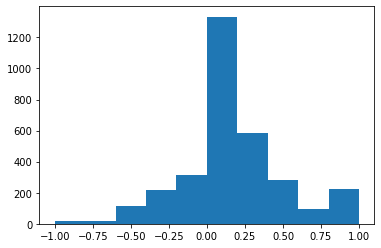

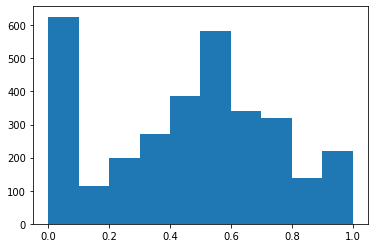

In [18]:
plt.hist(df['sentiment'])
plt.show()
plt.hist(df['subjectivity'])
plt.show()

In [395]:
df = df[df['text']!='']

In [396]:
df['favorite_count']

0         4550
1        10450
2            0
3        40709
4        66378
         ...  
3191     92262
3192    119843
3193    154968
3194    257578
3195    178303
Name: favorite_count, Length: 3140, dtype: int64

In [397]:
word2count = {} 
for data in df['text']: 
    words = nltk.word_tokenize(data) 
    for word in words: 
        if word not in word2count.keys(): 
            word2count[word] = 1
        else: 
            word2count[word] += 1

In [398]:
word2count_summary = {k: v for k, v in sorted(word2count.items(), key=lambda item: item[1],reverse=True)}
word2count_summary 

{'great': 701,
 'people': 305,
 'u': 275,
 'news': 269,
 'job': 255,
 'president': 244,
 'country': 244,
 'year': 235,
 'tax': 235,
 'fake': 226,
 'america': 225,
 'today': 224,
 'american': 220,
 'thank': 218,
 'big': 216,
 'trump': 213,
 'state': 185,
 'democrat': 184,
 'many': 183,
 'time': 182,
 'republican': 167,
 'much': 153,
 'cut': 152,
 'get': 151,
 'want': 149,
 'would': 146,
 'day': 145,
 'new': 144,
 'must': 142,
 'good': 140,
 'medium': 136,
 'make': 132,
 'border': 131,
 'house': 122,
 'honor': 118,
 'first': 118,
 'military': 117,
 'never': 116,
 'election': 115,
 'meeting': 115,
 'back': 110,
 'korea': 110,
 'vote': 107,
 'going': 107,
 'united': 106,
 'one': 106,
 'russia': 106,
 'working': 104,
 'deal': 104,
 'north': 99,
 'need': 96,
 'hard': 95,
 'even': 95,
 'national': 95,
 'dont': 93,
 'story': 92,
 'security': 92,
 'trade': 91,
 'made': 91,
 'dems': 91,
 'bill': 90,
 'china': 90,
 'like': 89,
 'nation': 87,
 'bad': 87,
 'thing': 87,
 'obama': 86,
 'win': 83,
 'e

In [399]:
top100 = list(word2count_summary.items())[0: 100]

In [400]:
comm_words=[]
for i in range(0,100):
    wd=top100[i][0]
    comm_words.append(wd)

comm_words.remove('u')
comm_words.remove('great')
comm_words.remove('people')

In [401]:
from sklearn import feature_extraction

In [402]:
from sklearn.feature_extraction.text import CountVectorizer
vect= CountVectorizer(ngram_range=(1,3), max_features=300).fit(df['text'])# change the max feature could increase the accurancy but do not know which one is the best
txt= vect.transform(df['text'])

X_tf=pd.DataFrame(txt.toarray(), columns=vect.get_feature_names())

In [403]:
X_tf_short = X_tf[comm_words]

In [404]:
X_tf_short=X_tf_short.apply(lambda x: x>=1)
X_tf_short=X_tf_short.apply(lambda x: x.astype('float'))

In [405]:
X_tf_short

,news,job,president,country,year,tax,fake,america,today,american,...,see,go,family,long,obamacare,collusion,white,daca,campaign,also
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3136,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3137,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3138,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [406]:
X_tf_short['likes'] = df['favorite_count'] 

In [407]:
X_tf_short=X_tf_short[X_tf_short['likes']>0]

In [408]:
Y=X_tf_short['likes'].to_numpy()
X = X_tf_short.drop(columns=['likes']).to_numpy()

In [409]:
from sklearn.tree import DecisionTreeRegressor

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=20)
regr_2 = DecisionTreeRegressor(max_depth=100)
regr_3 = DecisionTreeRegressor(max_depth=50)
regr_1.fit(X, Y)
regr_2.fit(X, Y)
regr_3.fit(X, Y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=50,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [410]:
y_1 = regr_1.predict(X)
y_2 = regr_2.predict(X)
y_3 = regr_3.predict(X)

In [411]:
import numpy as np

In [412]:
np.mean((y_1-Y)**2)
np.mean((y_2-Y)**2)
np.mean((y_3-Y)**2)

367518029.2592198

In [413]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [414]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

In [415]:
vec = CountVectorizer()
vec.fit(df.text.values)
features = vec.transform(df.text.values).toarray()

In [416]:
n_clusters = 2
cls = KMeans(n_clusters=n_clusters)
cls.fit(features)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [417]:
clusters = cls.predict(features)

In [418]:
max(clusters)

1

In [419]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(features)

# reduce the cluster centers to 2D
reduced_cluster_centers = pca.transform(cls.cluster_centers_)

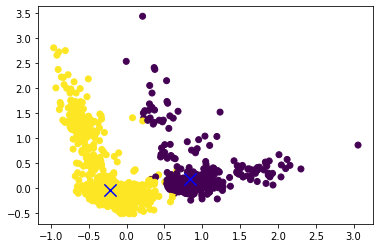

In [420]:
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=cls.fit_predict(features))
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='b')
plt.show()

In [421]:
# how well are they correlated 
from sklearn.metrics import silhouette_score
silhouette_score(features, labels=cls.predict(features))


0.02318640630878734

mean likes: 74704.47004423 45288.245984460045


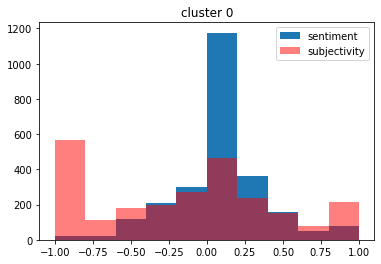

mean likes: 81738.59264931087 35429.486467174145


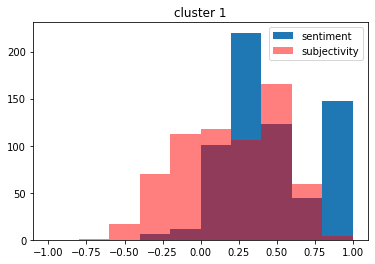

In [422]:
for ii in range(n_clusters):
    cluster = df['text'][clusters==ii]
    print('mean likes:', df['favorite_count'][clusters==ii].mean(),df['favorite_count'][clusters==ii].std())
    plt.title('cluster %d'%ii)
    _ = plt.hist(cluster.apply(lambda x: senti(x).polarity),label='sentiment',bins=np.linspace(-1,1,11))
    _ = plt.hist(cluster.apply(lambda x: (senti(x).subjectivity-0.5)*2),label='subjectivity',alpha=0.5,color='red',bins=np.linspace(-1,1,11))
    plt.legend()
    plt.show()

In [461]:
# number of topics to extract
n_topics = 5

vec = TfidfVectorizer(max_features=5000, stop_words="english", max_df=0.95, min_df=2)
features = vec.fit_transform(df.text)
print(features.shape)
from sklearn.decomposition import NMF, LatentDirichletAllocation
cls = NMF(n_components=n_topics)
cls.fit(features)


(3140, 3019)


NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=5, random_state=None, shuffle=False, solver='cd', tol=0.0001,
    verbose=0)

In [463]:
# list of unique words found by the vectorizer
feature_names = vec.get_feature_names()
print(len(feature_names))
# number of most influencing words to display per topic
n_top_words = 15

for i, topic_vec in enumerate(cls.components_):
    print(i, end=' ')
    for fid in topic_vec.argsort()[-1:-n_top_words-1:-1]:
        print(feature_names[fid], end=' ')
    print()


3019
0 great america make making honor day safe happy today meeting support work state rally friend 
1 tax cut republican people big country democrat want american year vote today border great healthcare 
2 thank honor president welcome great today trump behalf wonderful woman melania minister prime men responder 
3 news fake medium trump story russia election president cnn collusion report obama dishonest russian phony 
4 job market great stock unemployment high record year american new lowest dollar economy billion million 


In [446]:
n_topics = 10


cls = LatentDirichletAllocation(n_components=n_topics)
cls.fit(features)

for i, topic_vec in enumerate(cls.components_):
    print(i, end=' ')
    for fid in topic_vec.argsort()[-1:-n_top_words-1:-1]:
        print(feature_names[fid], end=' ')
    print()

0 want border democrat republican people daca wall great immigration deal law congress tax dont crime 
1 welcome great minister thank prime honor today house anthem country national melania white president player 
2 weekly address comey korea classified north puerto leak information james rico memo dems kim watch 
3 great america make job thank honor tax people country today cut day news love making 
4 great thank president job china american country john trump border governor congratulation effort protect family 
5 great enjoy meeting president big tonight pm today interviewed happy day tax morning trump forward 
6 clinton hillary election collusion russia join democrat crooked repeal campaign fbi replace live republican tax 
7 news fake medium witch hunt dishonest trump american people failing collusion greatest story true let 
8 thank president people trade year china trump state country america xi war united opportunity great 
9 market stock high record job news hit unemployment ye

In [426]:
#nearest neighbors

In [491]:
from sklearn.neighbors import NearestNeighbors
vec = CountVectorizer()
vec.fit(df.text.values)
features = vec.transform(df.text.values).toarray()
knn = NearestNeighbors(n_neighbors=2, metric='l2')
knn.fit(features)


NearestNeighbors(algorithm='auto', leaf_size=30, metric='l2',
                 metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                 radius=1.0)

In [492]:
res = knn.kneighbors(features[0:1], return_distance=False)[0]

In [493]:
for ii in res:
    print(ii)
    print(df['text'][ii]) 

0
met un secretarygeneral antónio guterres working hard make united nation great un solve conflict around world mean u le save money fantastic job
418
special council told find crime whether crime exists opposed selection mueller special council still opposed think president trump right said never special council appointed


'leaving south korea heading china looking much forward meeting president xi'